<font size="20">Predicting Stock Market Trends Using Predictive Analytics, Prophet Analysis</font>

Author: Yagnesh Rajani

<font size="20" color = "Blue">Libraries, Packages and Data Setup</font>

Install and Import Libraries and Packages

In [1]:
#%pip install matplotlib
#%pip install pandas
#%pip install prophet
#%pip install scikit-learn

import sklearn.metrics as metrics
import pandas as pd
from prophet import Prophet
from matplotlib import pyplot as plt

Importing plotly failed. Interactive plots will not work.


Import Datasets

In [2]:
raw_dataset = pd.DataFrame(pd.read_csv("dataset.csv", sep = ",", header = 0, parse_dates=['Date']))

Format Date to fit Prophet Modeling Requirements

In [3]:
attribute_list = ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']
dataset = raw_dataset[attribute_list]
date = raw_dataset['Date']
date = date.astype('string')
date = date.str[:-15]
dataset.insert(0, "Date", date)
dataset.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1962-01-02,0.058398,0.060358,0.058398,0.058398,841958,0.0,0.0
1,1962-01-03,0.058398,0.059378,0.058398,0.059182,801865,0.0,0.0
2,1962-01-04,0.059182,0.059378,0.058791,0.059182,962238,0.0,0.0
3,1962-01-05,0.059182,0.059574,0.058987,0.059378,962238,0.0,0.0
4,1962-01-08,0.059378,0.060162,0.058007,0.059182,1282984,0.0,0.0


Model Evaluation Setup

In [4]:
evals = []
def evaluations(test, pred):
    mae = metrics.mean_absolute_error(test, pred)
    mape = metrics.mean_absolute_percentage_error(test, pred)
    mse = metrics.mean_squared_error(test, pred)
    rmse = mse**0.5
    #evals = {'MAE': mae, "MAPE": mape, "MSE": mse, "RMSE": rmse}
    evals = [mae, mape, mse, rmse]
    return(evals)

<font size="6" color = "Orange">Split the Data Into Training and Testing Datasets</font>

Find the Index Where the Data Will be Split

In [5]:
# Get the index where the training and test datasets will be split from
# Note that due to the abundance of data, we are using an 80% training and 20% testing split
splitval = 0.80
div_index = round(dataset.shape[0] * splitval)
split_date = dataset['Date'].iloc[div_index]
print("The index where the data will be split is: ", div_index)
print("The date where the data will be split is: ", split_date)

The index where the data will be split is:  12358
The date where the data will be split is:  2011-02-03


Split the Dataset

In [6]:
train_data = dataset[:div_index]
test_data = dataset[div_index:]

Find the Index of the First Day in 2020

In [7]:
covid_index = dataset[dataset['Date'] == "2020-01-02"].index.values
print(covid_index)

[14600]


Split the Dataset for the Covid Model

In [8]:
covid_train_data = dataset[:covid_index[0]]
covid_test_data = dataset[covid_index[0]:]

<font size="6" color = "Orange">Model Training and Testing</font>

Regular Model

19:38:58 - cmdstanpy - INFO - Chain [1] start processing
19:39:02 - cmdstanpy - INFO - Chain [1] done processing


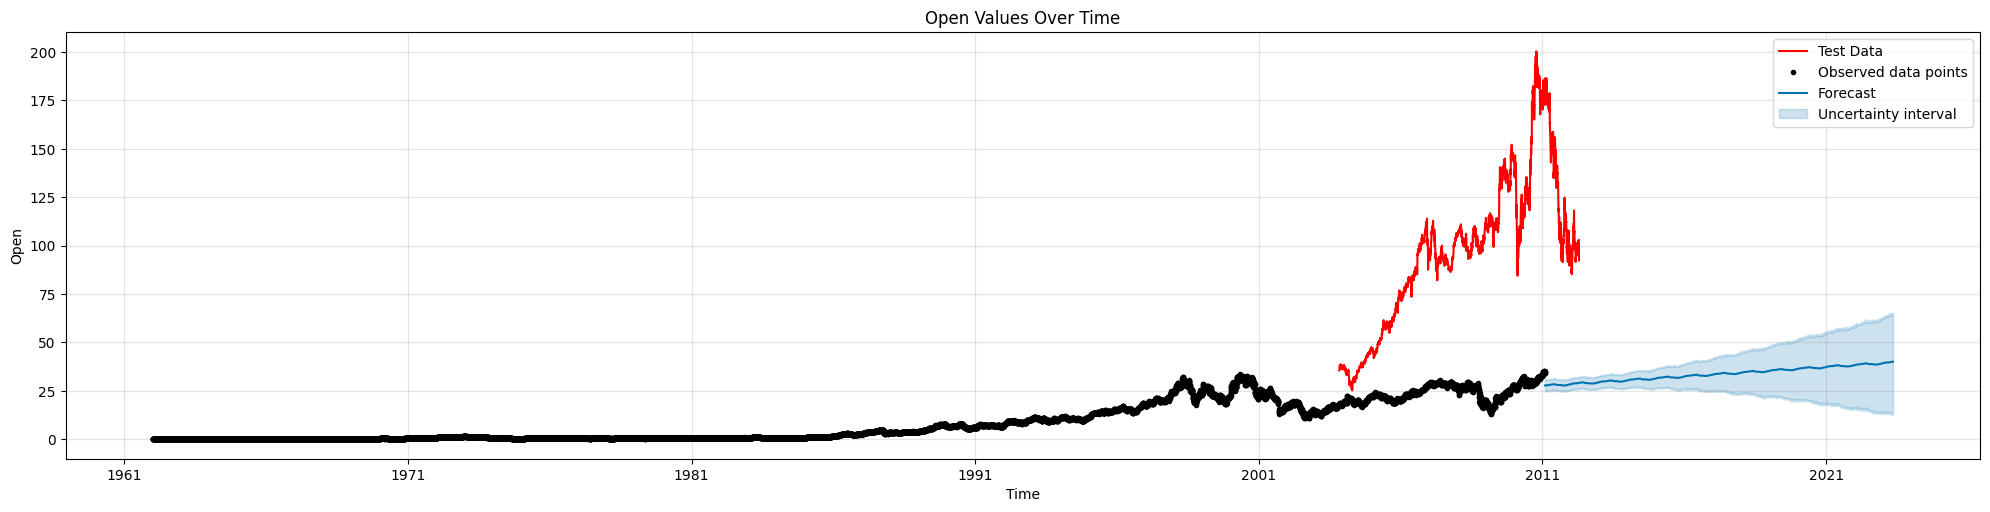

19:39:04 - cmdstanpy - INFO - Chain [1] start processing
19:39:08 - cmdstanpy - INFO - Chain [1] done processing


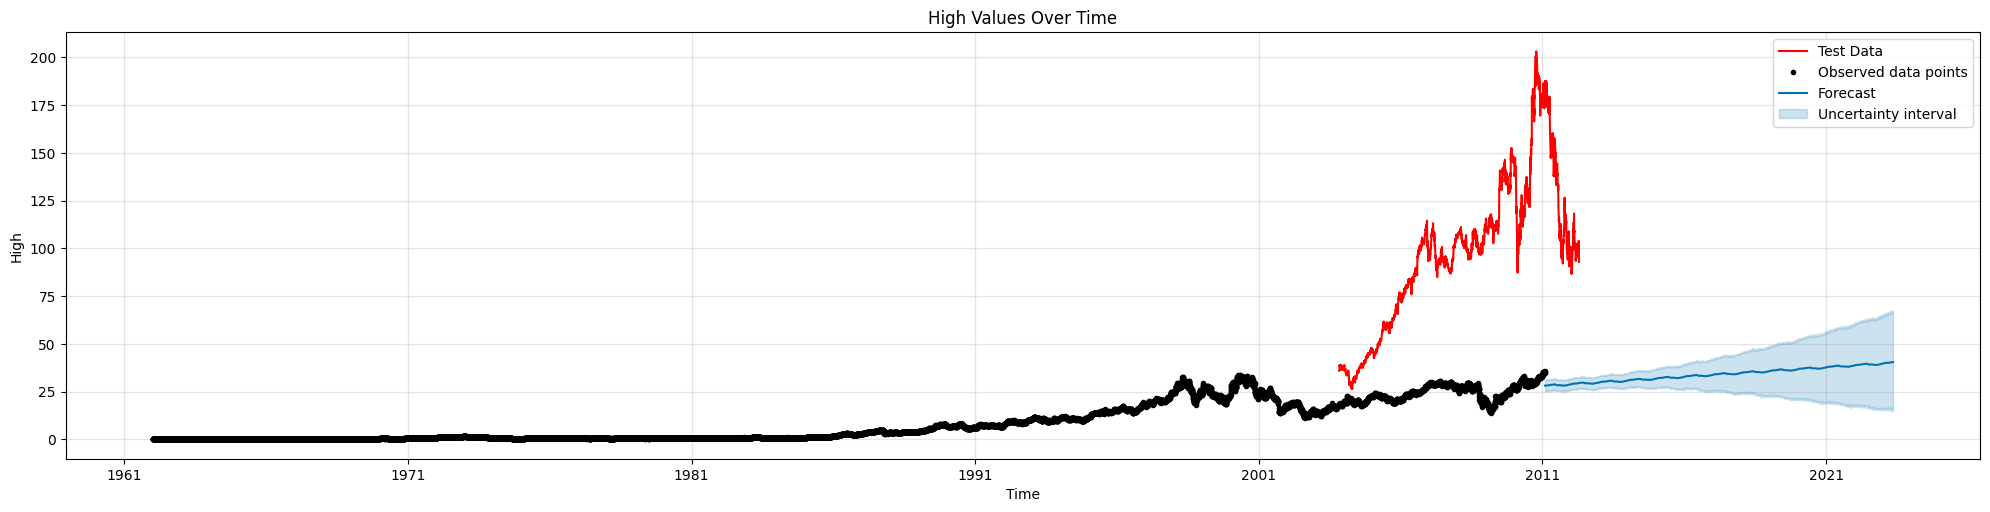

19:39:10 - cmdstanpy - INFO - Chain [1] start processing
19:39:13 - cmdstanpy - INFO - Chain [1] done processing


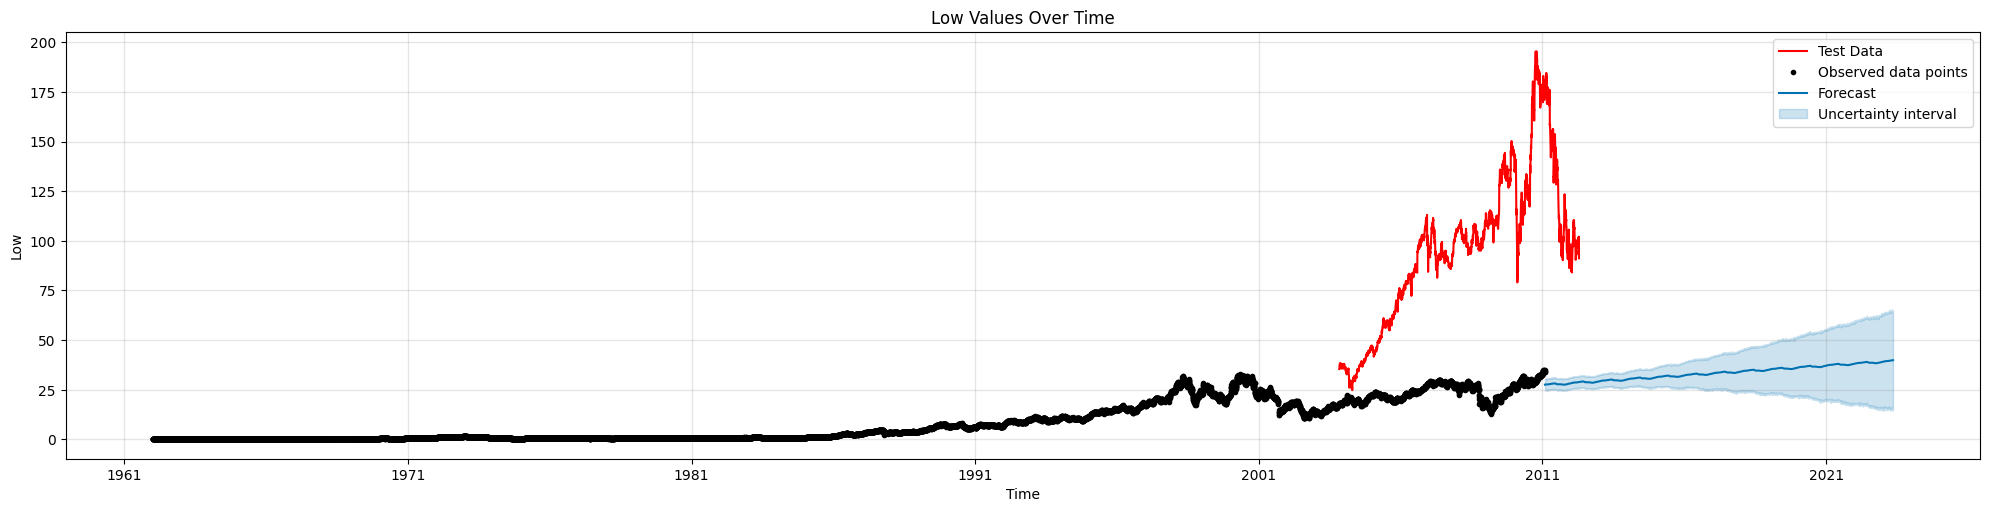

19:39:15 - cmdstanpy - INFO - Chain [1] start processing
19:39:19 - cmdstanpy - INFO - Chain [1] done processing


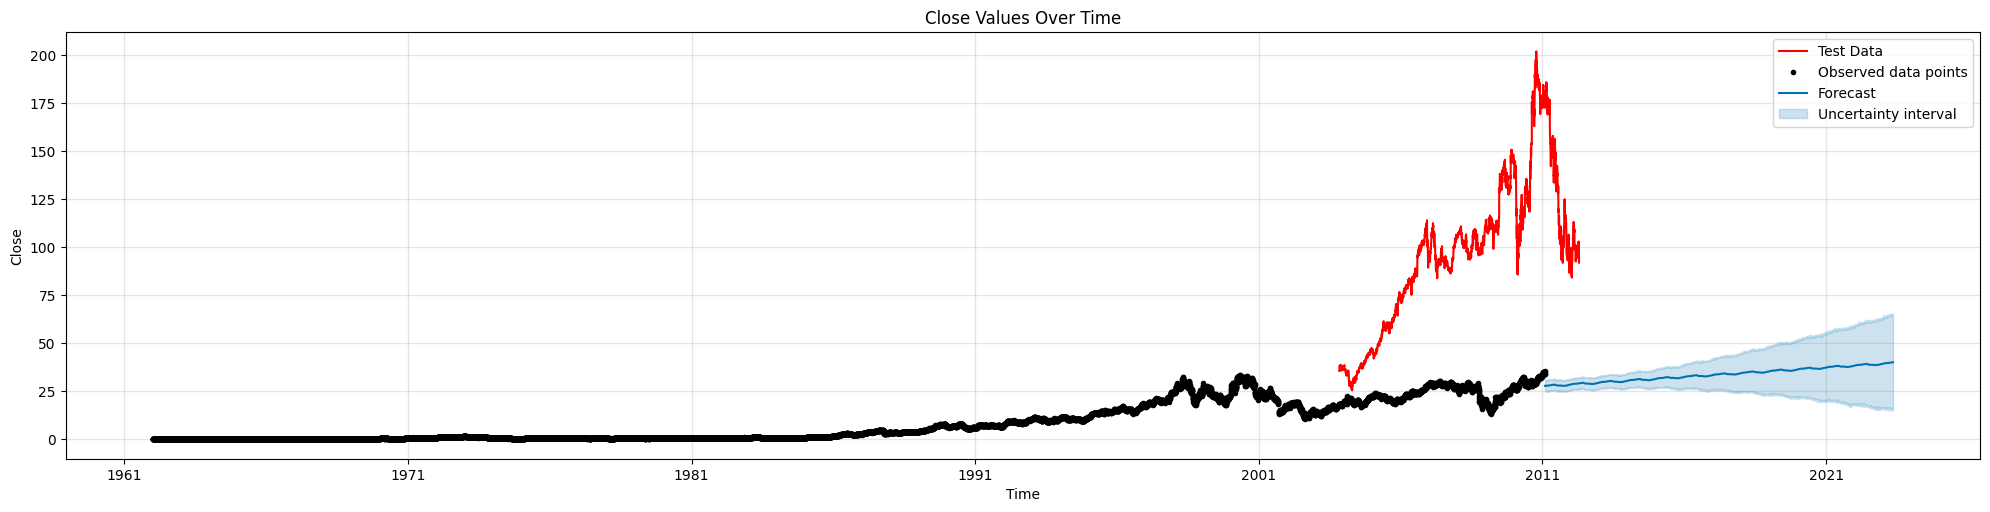

19:39:21 - cmdstanpy - INFO - Chain [1] start processing
19:39:24 - cmdstanpy - INFO - Chain [1] done processing


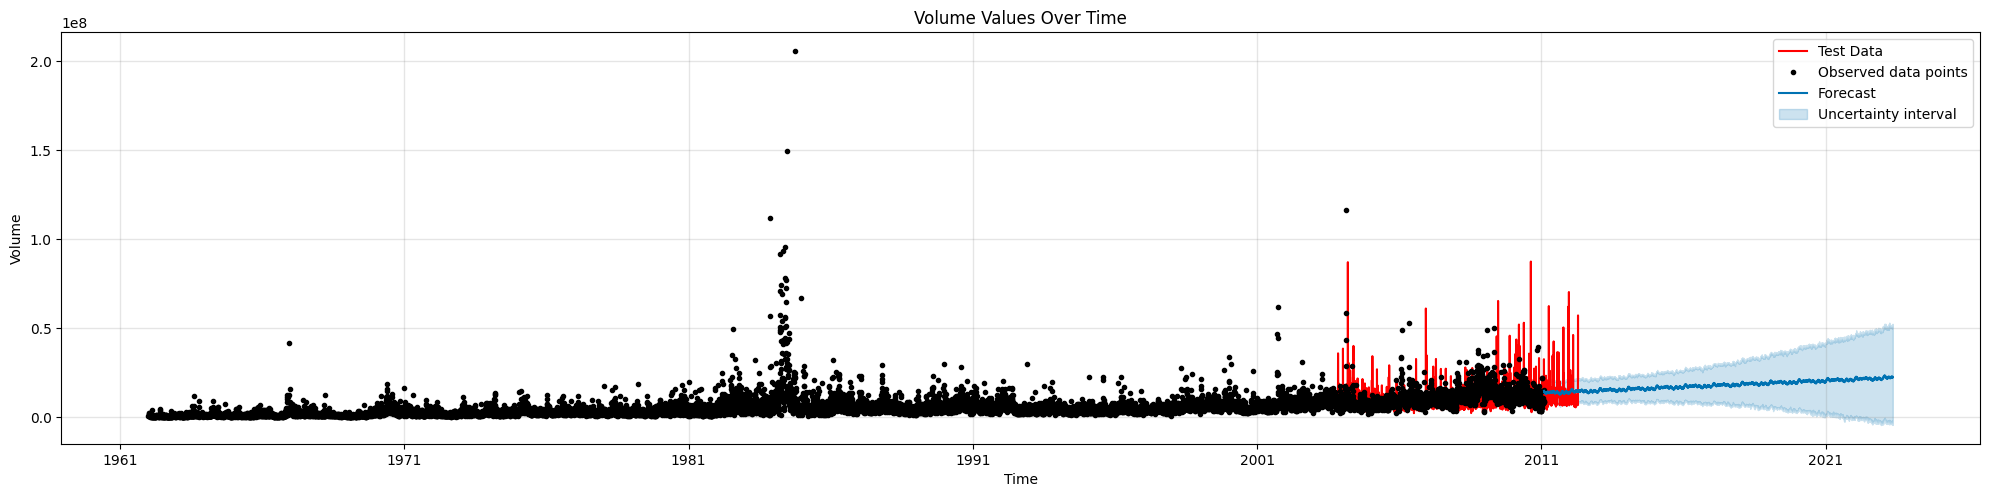

19:39:25 - cmdstanpy - INFO - Chain [1] start processing
19:39:26 - cmdstanpy - INFO - Chain [1] done processing


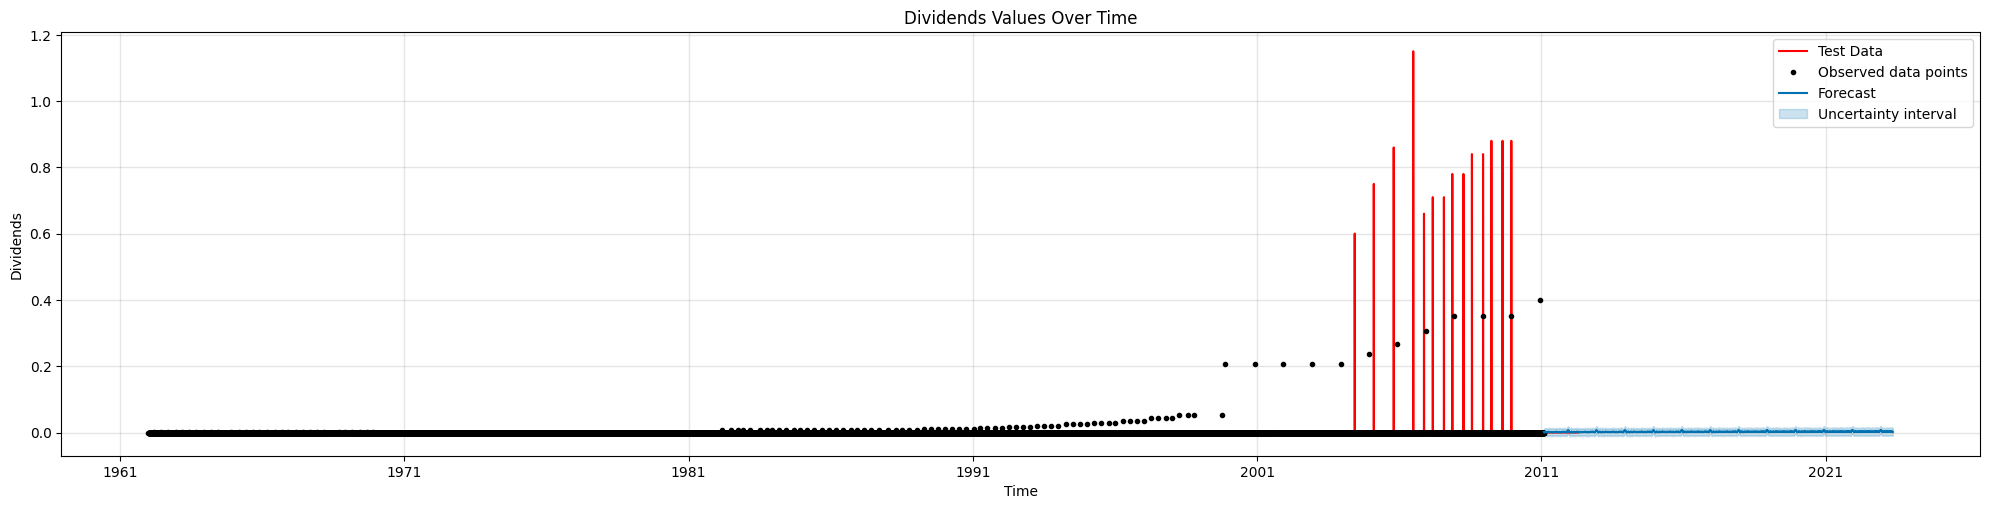

19:39:27 - cmdstanpy - INFO - Chain [1] start processing
19:39:27 - cmdstanpy - INFO - Chain [1] done processing


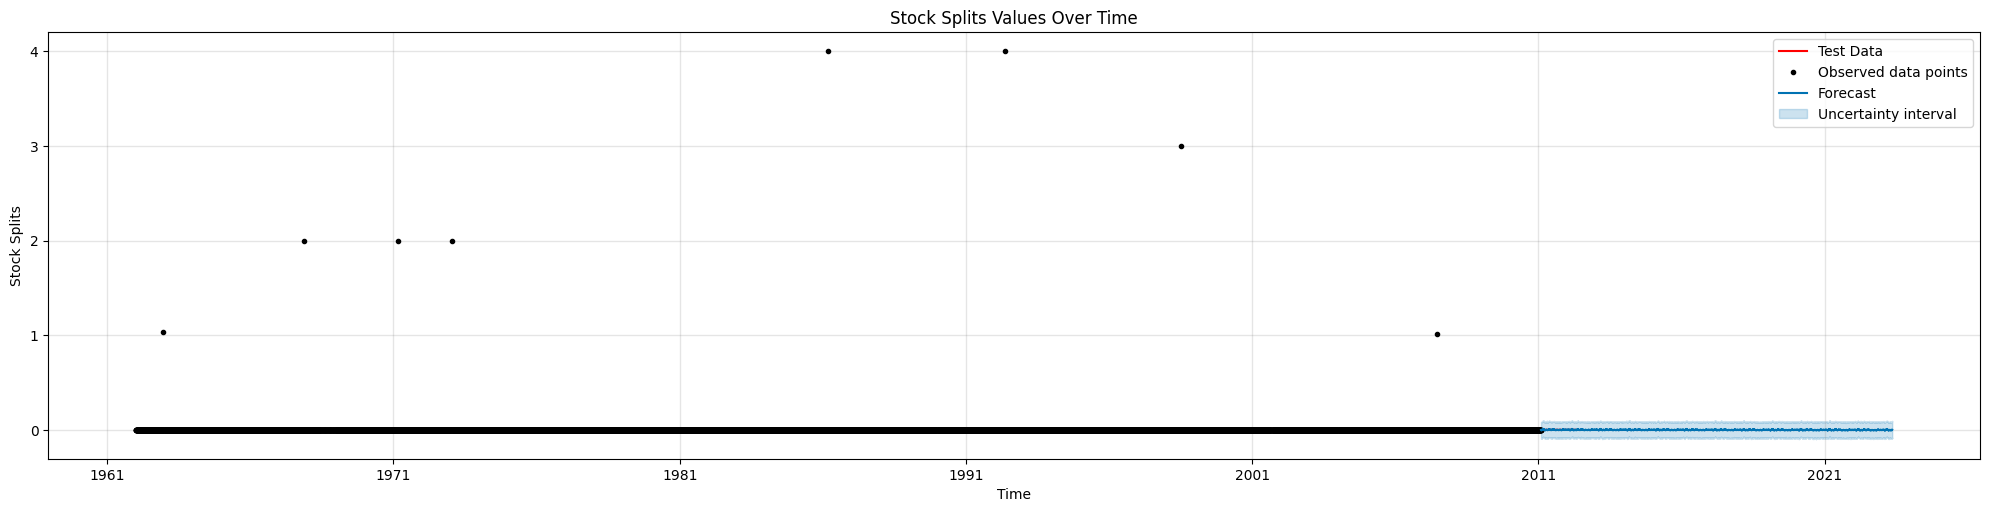

In [9]:
forecast_eval = pd.DataFrame(columns = ["MAE", "MAPE", "MSE", "RMSE"])

for values in attribute_list:
    # Select the data to be modeled
    prophet_train_data = train_data[['Date', values]].copy(deep = True)
    prophet_test_data = test_data[['Date', values]].copy(deep = True)

    # Format data for the prophet model
    prophet_train_data = prophet_train_data[['Date', values]].rename(columns={'Date': 'ds', values: 'y'})
    prophet_test_data = prophet_test_data[['Date', values]].rename(columns={'Date': 'ds', values: 'y'})

    # Select and fit the model
    model = Prophet()
    model.fit(prophet_train_data)

    # Use the model to predict values over the training set
    forecast = model.predict(prophet_test_data)
    
    # Calculate metrics using the evaluations function
    forecast_eval.loc[values] = evaluations(test_data[values], forecast['yhat'])


    fig, ax = plt.subplots(figsize = (20, 5))
    ax.plot(prophet_test_data.index, prophet_test_data['y'], color = 'r', label = 'Test Data')
    fig = model.plot(forecast, ax = ax)
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel(values)
    plt.title(f"{values} Values Over Time")
    plt.show()

COVID19 Model

19:39:29 - cmdstanpy - INFO - Chain [1] start processing
19:39:34 - cmdstanpy - INFO - Chain [1] done processing


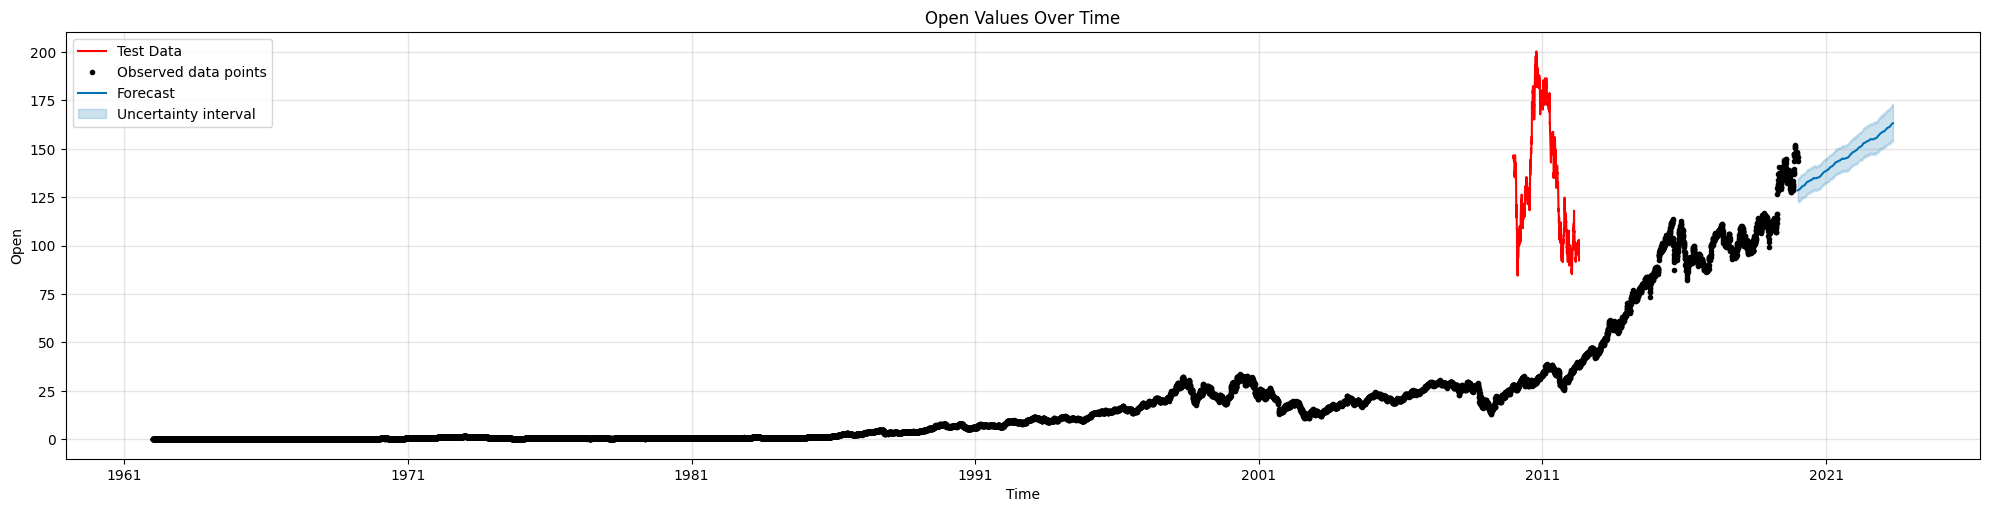

19:39:35 - cmdstanpy - INFO - Chain [1] start processing
19:39:40 - cmdstanpy - INFO - Chain [1] done processing


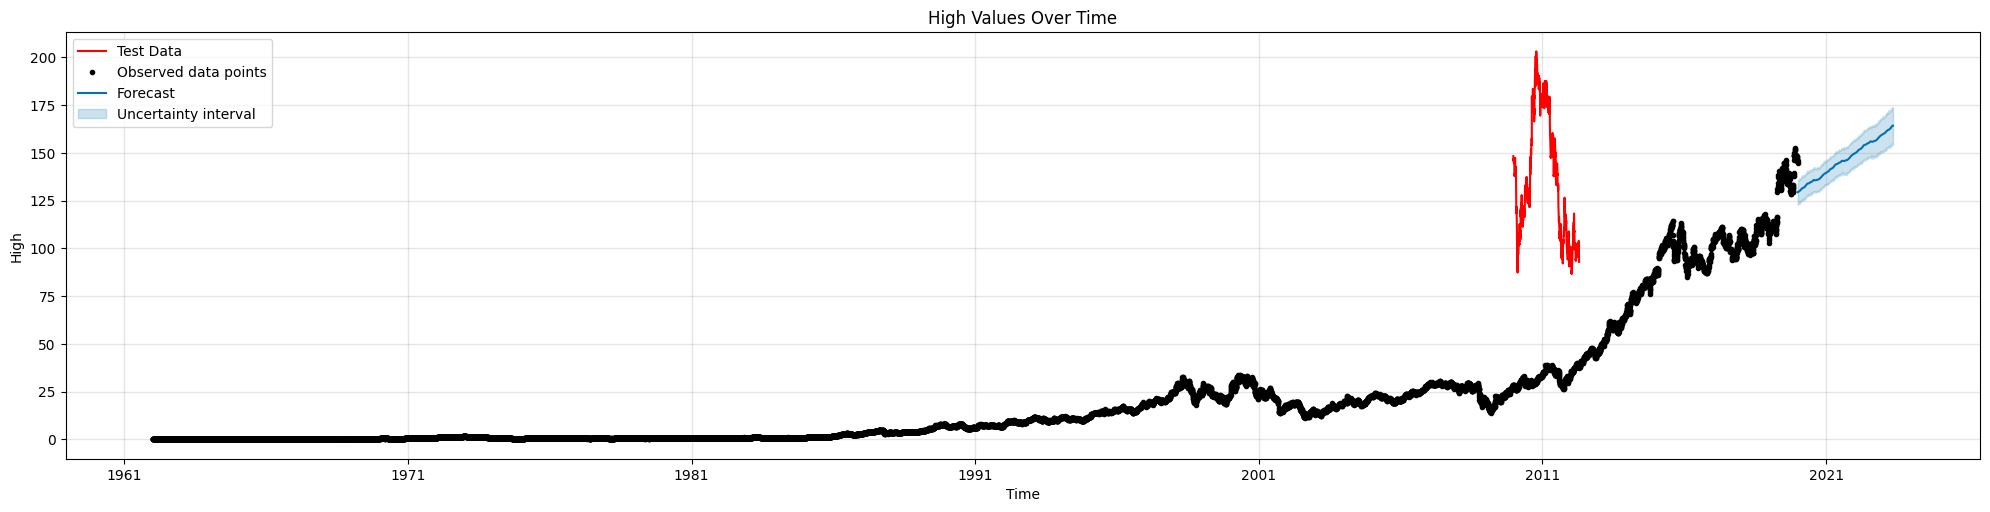

19:39:41 - cmdstanpy - INFO - Chain [1] start processing
19:39:46 - cmdstanpy - INFO - Chain [1] done processing


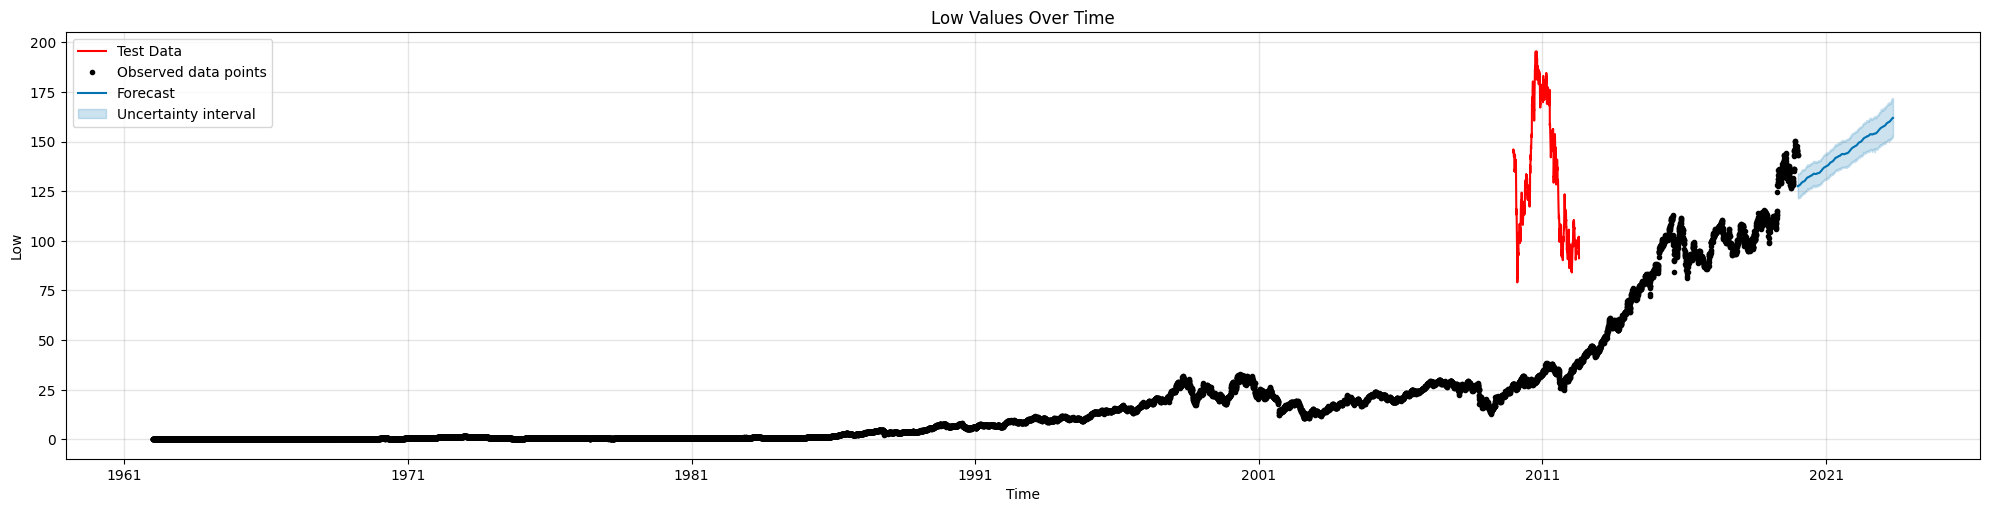

19:39:47 - cmdstanpy - INFO - Chain [1] start processing
19:39:52 - cmdstanpy - INFO - Chain [1] done processing


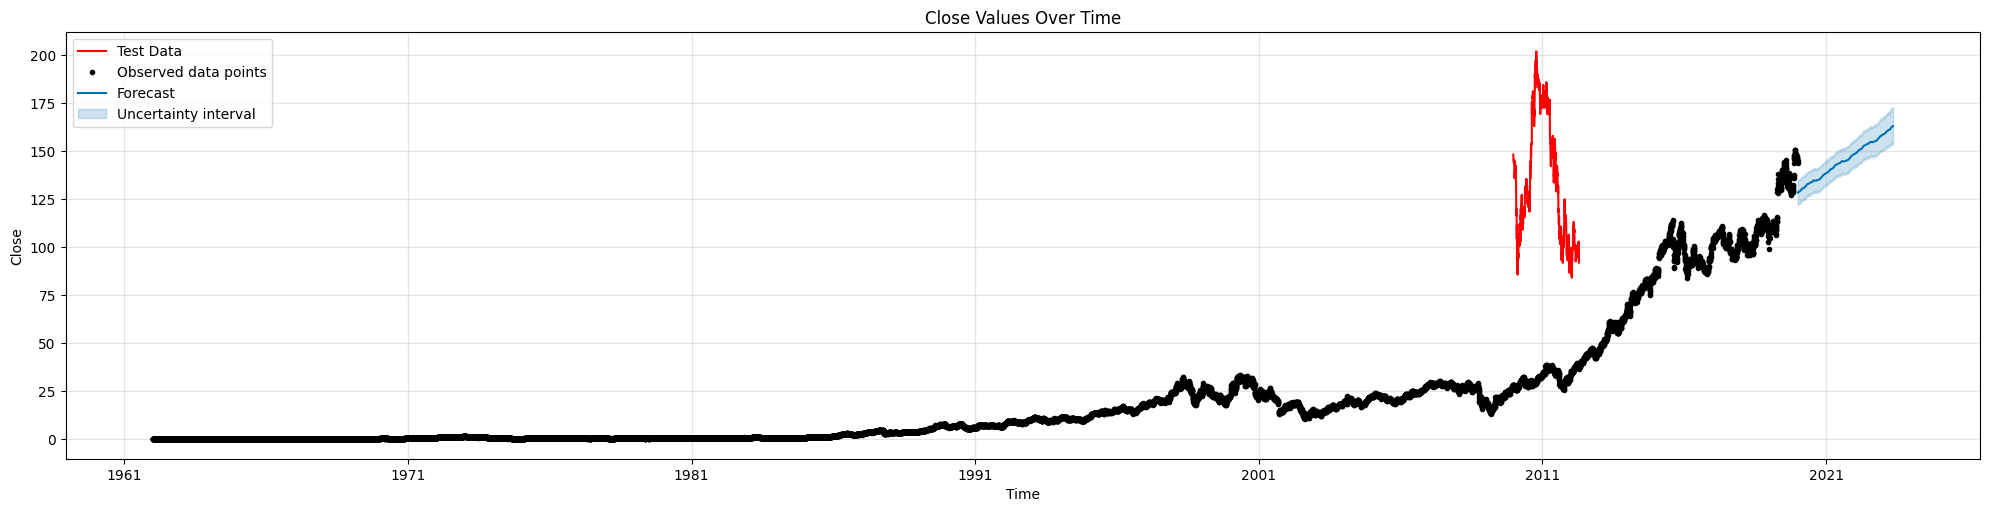

19:39:53 - cmdstanpy - INFO - Chain [1] start processing
19:39:58 - cmdstanpy - INFO - Chain [1] done processing


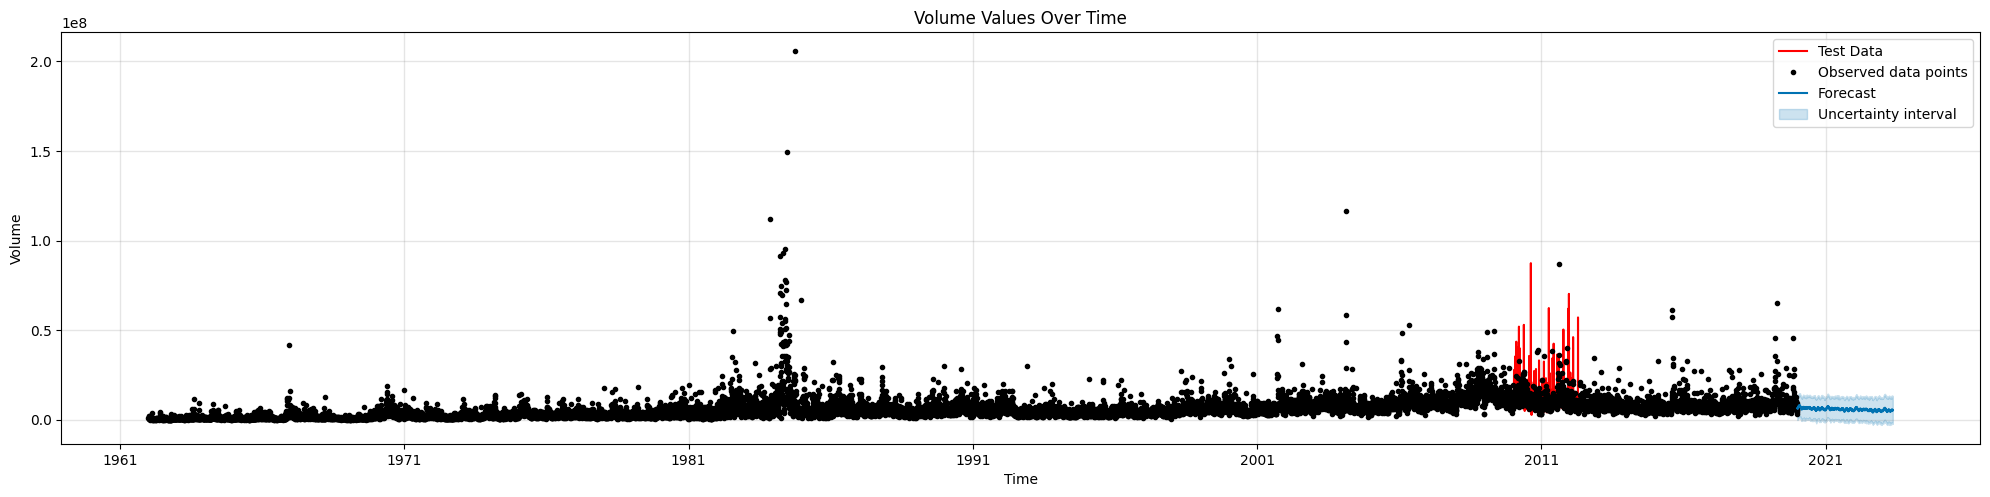

19:39:59 - cmdstanpy - INFO - Chain [1] start processing
19:39:59 - cmdstanpy - INFO - Chain [1] done processing


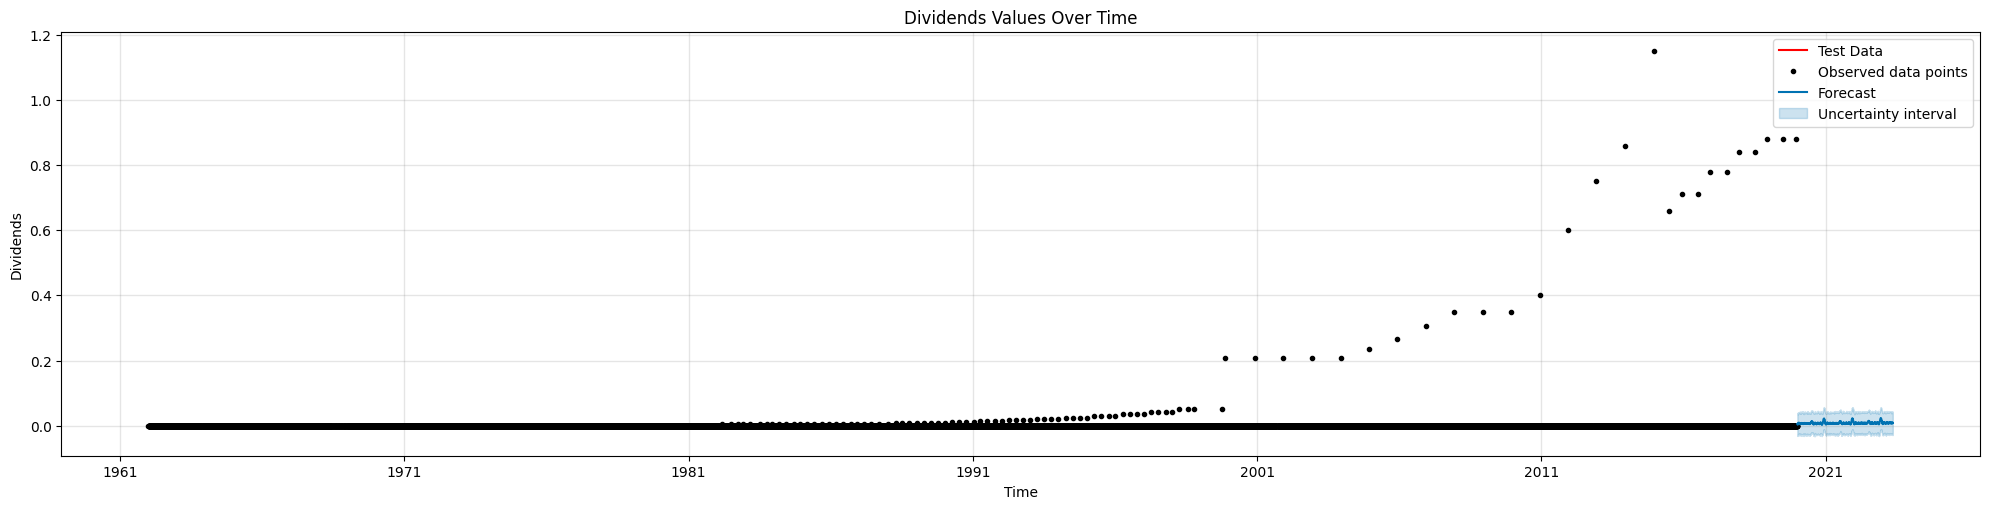

19:40:01 - cmdstanpy - INFO - Chain [1] start processing
19:40:01 - cmdstanpy - INFO - Chain [1] done processing


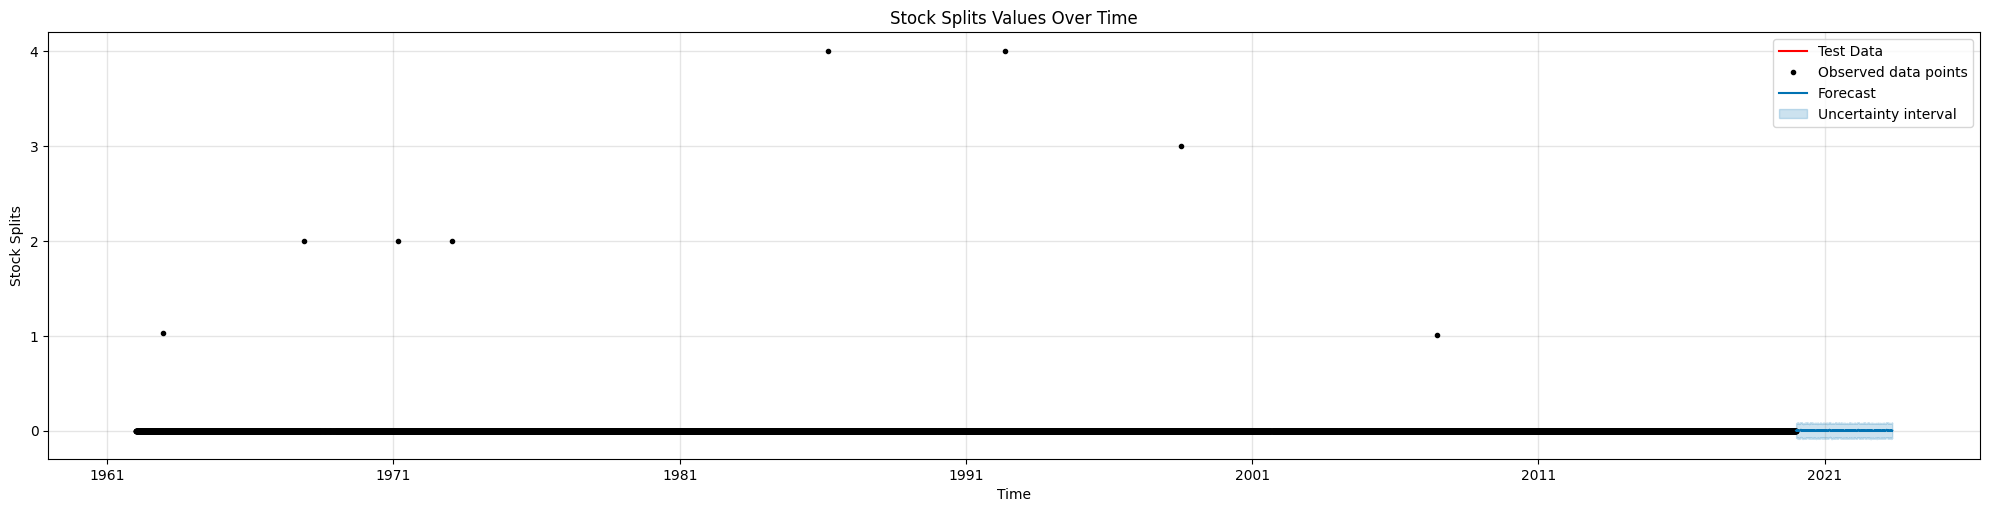

In [10]:
covid_forecast_eval = pd.DataFrame(columns = ["MAE", "MAPE", "MSE", "RMSE"])

for values in attribute_list:
    # Select the data to be modeled
    prophet_train_data = covid_train_data[['Date', values]].copy(deep = True)
    prophet_test_data = covid_test_data[['Date', values]].copy(deep = True)

    # Format data for the prophet model
    prophet_train_data = prophet_train_data[['Date', values]].rename(columns={'Date': 'ds', values: 'y'})
    prophet_test_data = prophet_test_data[['Date', values]].rename(columns={'Date': 'ds', values: 'y'})

    # Select and fit the model
    model = Prophet()
    model.fit(prophet_train_data)

    # Use the model to predict values over the training set
    covid_forecast = model.predict(prophet_test_data)

    # Calculate metrics using the evaluations function
    covid_forecast_eval.loc[values] = evaluations(test_data[values], forecast['yhat'])

    fig, ax = plt.subplots(figsize = (20, 5))
    ax.plot(prophet_test_data.index, prophet_test_data['y'], color = 'r', label = 'Test Data')
    fig = model.plot(covid_forecast, ax = ax)
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel(values)
    plt.title(f"{values} Values Over Time")
    plt.show()

<font size="6" color = "Orange">Model Evaluation</font>

Regular Model Metrics

In [11]:
forecast_eval        

,MAE,MAPE,MSE,RMSE
Open,6.344027e+01,5.900297e-01,5.330865e+03,7.301277e+01
High,6.396635e+01,5.894882e-01,5.424140e+03,7.364876e+01
Low,6.271282e+01,5.893389e-01,5.204500e+03,7.214222e+01
Close,6.336210e+01,5.895749e-01,5.315975e+03,7.291073e+01
Volume,9.512274e+06,1.313963e+00,1.096485e+14,1.047132e+07
Dividends,5.758452e-03,9.531284e+12,3.005348e-03,5.482106e-02
Stock Splits,2.294912e-03,1.033536e+13,8.282690e-06,2.877966e-03


Covid Model Metrics

In [12]:
covid_forecast_eval

,MAE,MAPE,MSE,RMSE
Open,9.711438e+01,1.000004e+00,1.095187e+04,1.046512e+02
High,9.797460e+01,1.000004e+00,1.114963e+04,1.055918e+02
Low,9.614594e+01,1.000005e+00,1.072782e+04,1.035752e+02
Close,9.707418e+01,1.000004e+00,1.093908e+04,1.045901e+02
Volume,9.618157e+06,1.000000e+00,1.318385e+14,1.148209e+07
Dividends,5.951419e-03,1.030735e+13,3.041884e-03,5.515328e-02
Stock Splits,2.294912e-03,1.033536e+13,8.282690e-06,2.877966e-03
